In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sxs

In [3]:
# sxs_bbh_0169 = sxs.load("SXS:BBH:0169")
# ValueError: Simulation 'SXS:BBH:0169v2.0' is superseded by 'SXS:BBH:2425'.
# Note that you could enable `auto_supersede` to automatically
# load the superseding simulation.  Alternatively, you could
# pass `ignore_deprecation=True` or specify a version to load
# this waveform anyway.
# w = sxs_bbh_0169.h

In [19]:
df = sxs.load("simulations").dataframe
# get non-precessing simulations
mask = (df['reference_chi1_perp'] < 0.001) & (df['reference_chi2_perp'] < 0.001) & (df['deprecated'] == False) & (df['reference_eccentricity'] < 0.001) & (df['object_types'] == 'BHBH')
df = df[mask]

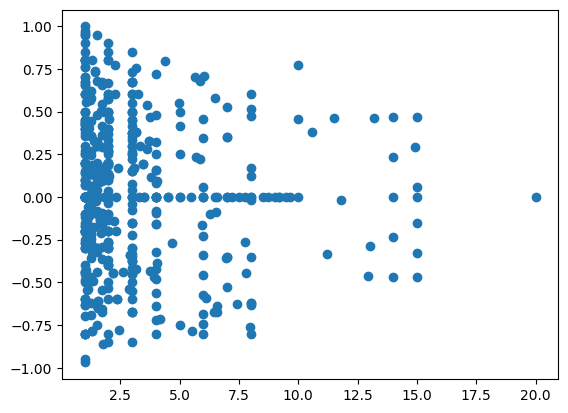

In [21]:
plt.figure()
plt.scatter(df['reference_mass_ratio'], df['reference_chi_eff'])

135

In [66]:
df.iloc[[df['reference_chi_eff'].argmax()]]

deprecated  reference_time  reference_mass_ratio  \
SXS:BBH:1124       False           380.0              0.999999   

                                  reference_dimensionless_spin1  \
SXS:BBH:1124  [-5.15196629794e-10, 1.37475766096e-09, 0.9980...   

              reference_dimensionless_spin1_mag  \
SXS:BBH:1124                           0.998001   

                                  reference_dimensionless_spin2  \
SXS:BBH:1124  [2.75665899101e-10, -2.12189356949e-09, 0.9980...   

              reference_dimensionless_spin2_mag  reference_chi_eff  \
SXS:BBH:1124                           0.998001           0.998001   

              reference_chi1_perp  reference_chi2_perp  ...  \
SXS:BBH:1124         1.109538e-09         2.551519e-09  ...   

                                       initial_position1  \
SXS:BBH:1124  [7.682997206435502, 1.6663074718e-06, 0.0]   

                                        initial_position2  number_of_orbits  \
SXS:BBH:1124  [-7.683002793564498, 1.6663074718e-06, 0.0]         25.728036   

             superseded_by                      DOI_versions  keywords  \
SXS:BBH:1124           NaN  [, v1.2, v1.3, v1.4, v1.5, v2.0]        []   

                    date_link_earliest         date_run_earliest  \
SXS:BBH:1124 2014-10-10 21:10:28+00:00 1970-01-01 00:00:00+00:00   

                       date_run_latest       date_postprocessing  
SXS:BBH:1124 1970-01-01 00:00:00+00:00 2019-04-21 01:22:40+00:00  

[1 rows x 59 columns]

In [67]:
df.iloc[[df['reference_mass_ratio'].argmax()]]

deprecated  reference_time  reference_mass_ratio  \
SXS:BBH:2516       False           620.0             19.996309   

                                  reference_dimensionless_spin1  \
SXS:BBH:2516  [1.28577143268e-07, 1.16636111059e-07, 3.43446...   

              reference_dimensionless_spin1_mag  \
SXS:BBH:2516                           0.000034   

                                  reference_dimensionless_spin2  \
SXS:BBH:2516  [-2.20780726287e-08, -1.56959721395e-10, -0.00...   

              reference_dimensionless_spin2_mag  reference_chi_eff  \
SXS:BBH:2516                           0.000102           0.000028   

              reference_chi1_perp  reference_chi2_perp  ...  \
SXS:BBH:2516         1.735896e-07         2.205809e-08  ...   

                                              initial_position1  \
SXS:BBH:2516  [0.5459907282262572, 0.0132312866294776, -7.53...   

                                              initial_position2  \
SXS:BBH:2516  [-10.821289577265443, 0.0132312866294776, -7.5...   

              number_of_orbits superseded_by  DOI_versions  keywords  \
SXS:BBH:2516         34.385048           NaN      [, v2.0]        []   

                    date_link_earliest         date_run_earliest  \
SXS:BBH:2516 2020-04-02 09:31:10+00:00 1970-01-01 00:00:00+00:00   

                       date_run_latest       date_postprocessing  
SXS:BBH:2516 1970-01-01 00:00:00+00:00 2021-01-16 13:16:02+00:00  

[1 rows x 59 columns]

In [68]:
# sxs_bbh = sxs.load("SXS:BBH:2425")
# sxs_bbh = sxs.load("SXS:BBH:1124")
sxs_bbh = sxs.load("SXS:BBH:2516")
w = sxs_bbh.h

  0%|                                                                                                         …

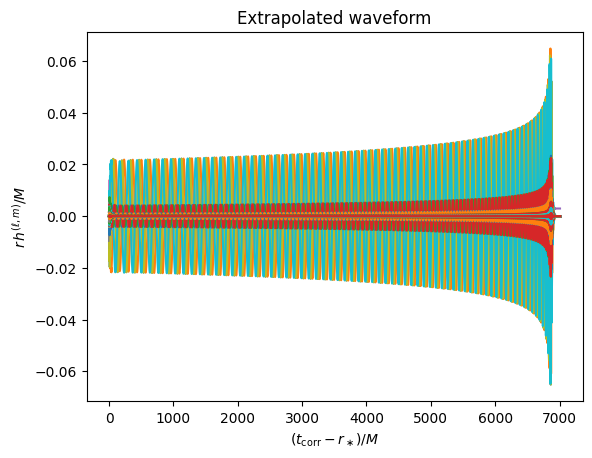

In [69]:
plt.plot(w.t, w.data.view(float))
plt.title(f"Extrapolated waveform")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$r\, h^{(\ell,m)}/M$");

In [70]:
reference_time = sxs_bbh.metadata.reference_time
reference_index = w.index_closest_to(reference_time)
w_sliced = w[reference_index:]


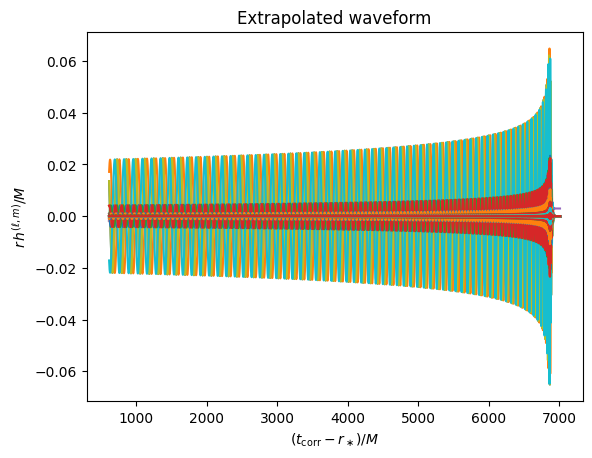

In [71]:
plt.plot(w_sliced.t, w_sliced.data.view(float))
plt.title(f"Extrapolated waveform")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$r\, h^{(\ell,m)}/M$");

In [72]:
i1 = w.index_closest_to(w.max_norm_time())
i2 = w.index_closest_to(w.max_norm_time() + 100.0)
w_ringdown = w[i1:i2]

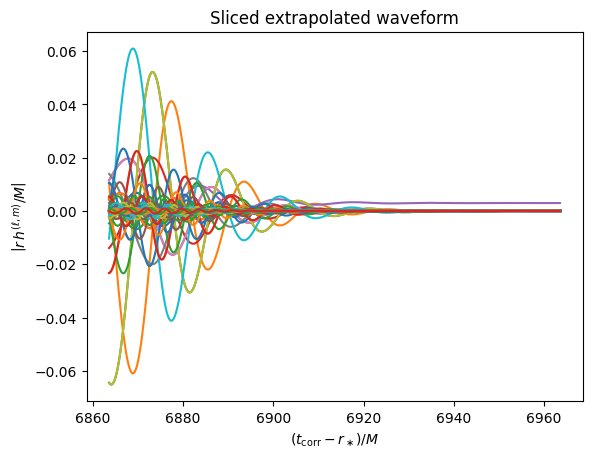

In [73]:
plt.plot(w_ringdown.t, w_ringdown.data.view(float))

plt.title(f"Sliced extrapolated waveform")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$\left| r\, h^{(\ell,m)}/M \right|$");

In [74]:
w_sliced.index(2,2)

4

In [75]:
sxs_bbh.metadata.reference_mass_ratio

19.996308846635245

In [76]:
sxs_bbh.metadata.reference_dimensionless_spin1

[1.28577143268e-07, 1.16636111059e-07, 3.43446903596e-05]

In [77]:
sxs_bbh.metadata.reference_dimensionless_spin2

[-2.20780726287e-08, -1.56959721395e-10, -0.0001021979009]

# hybridise

In [78]:
import copy

import lalsimulation as lalsim

import prim.hybrid
from prim import spliced_pn
from prim.waveform import Waveform
from prim.waveform_generator import generate_waveform

In [88]:
q = sxs_bbh.metadata.reference_mass_ratio
M = 50
modes = [(2, 2), (2, 1), (3, 3),(3,2),(4, 4),(4,3),(5,5),(5,4)]
# modes = [(2, 2), (3,2), (4, 4),(5,4)]
f_min_left = 25
S1z = sxs_bbh.metadata.reference_dimensionless_spin1[2]
S2z = sxs_bbh.metadata.reference_dimensionless_spin2[2]

In [89]:
# first we generate the 'left' waveform in our hybrid.
# This is typically an accurate inspiral waveform.
wf_dict = spliced_pn.generate_spliced_pn_waveform(
    q, modes, f_min=f_min_left, M=M, S1z=S1z, S2z=S2z
)
# wf_dict = generate_waveform(q, modes, approximant=lalsim.SpinTaylorT1, f_min=f_min_left)
# wf_dict = generate_waveform(
#     q,
#     modes,
#     approximant=lalsim.SpinTaylorT4,
#     f_min=f_min_left,
#     S1z=S1z,
#     S2z=S2z,
#     M=M,
# )
wf_left = Waveform(times=wf_dict["t"], hlms=wf_dict["hlm"])
t0_inspiral_left, _ = (
    wf_left.compute_amplitude().compute_phase().compute_frequency().compute_time_of_peak()
)
wf_left.apply_time_shift(-t0_inspiral_left)

In [90]:
# convert sxs into prim.Waveform class
mode_idxs = [w_sliced.index(*mode) for mode in modes]

wf_dict = {}
wf_dict['t'] = w_sliced.t
wf_dict['hlm'] = {mode:np.array(w_sliced[:,i]) for mode, i in zip(modes,mode_idxs)}


wf_right = Waveform(times=wf_dict['t'], hlms=wf_dict["hlm"])

t0_inspiral_right, _ = (
    wf_right.compute_amplitude().compute_phase().compute_frequency().compute_time_of_peak()
)
wf_right.apply_time_shift(-t0_inspiral_right)

In [91]:
win1, win2 = prim.hybrid.get_window_times(wf_right, n_cycles_before_window=2, n_cycles_in_window=6)

In [92]:
%%time
fit_modes = modes.copy()
# fit_modes = [(2, 2), (4, 4)]
time_shift_guess = 0
result = prim.hybrid.fit_hybrid(
    wf_left,
    wf_right,
    win1,
    win2,
    fit_modes,
    time_shift_guess,
    n_tries=5,
    max_nfev=None,
)

CPU times: user 19 s, sys: 269 ms, total: 19.2 s
Wall time: 19.3 s


In [93]:
wf_hybrid = prim.hybrid.build_hybrid(
    wf_left,
    wf_right,
    result.params["dt"],
    result.params["dphi"],
    result.params["dpsi"],
    win1,
    win2,
)
# compute derived quantities.
(
    wf_hybrid
    # .mask(-600)
    .compute_amplitude()
    .compute_phase()
    .compute_frequency()
)

# shift wf_right so we can overlay
wf_right_shifted = copy.deepcopy(wf_right)
(
    wf_right_shifted.apply_time_shift(-result.params["dt"])
    .apply_phase_shift(result.params["dphi"])
    .apply_polarisation_shift(result.params["dpsi"])
)


Text(0.5, 0, '$T [M]$')

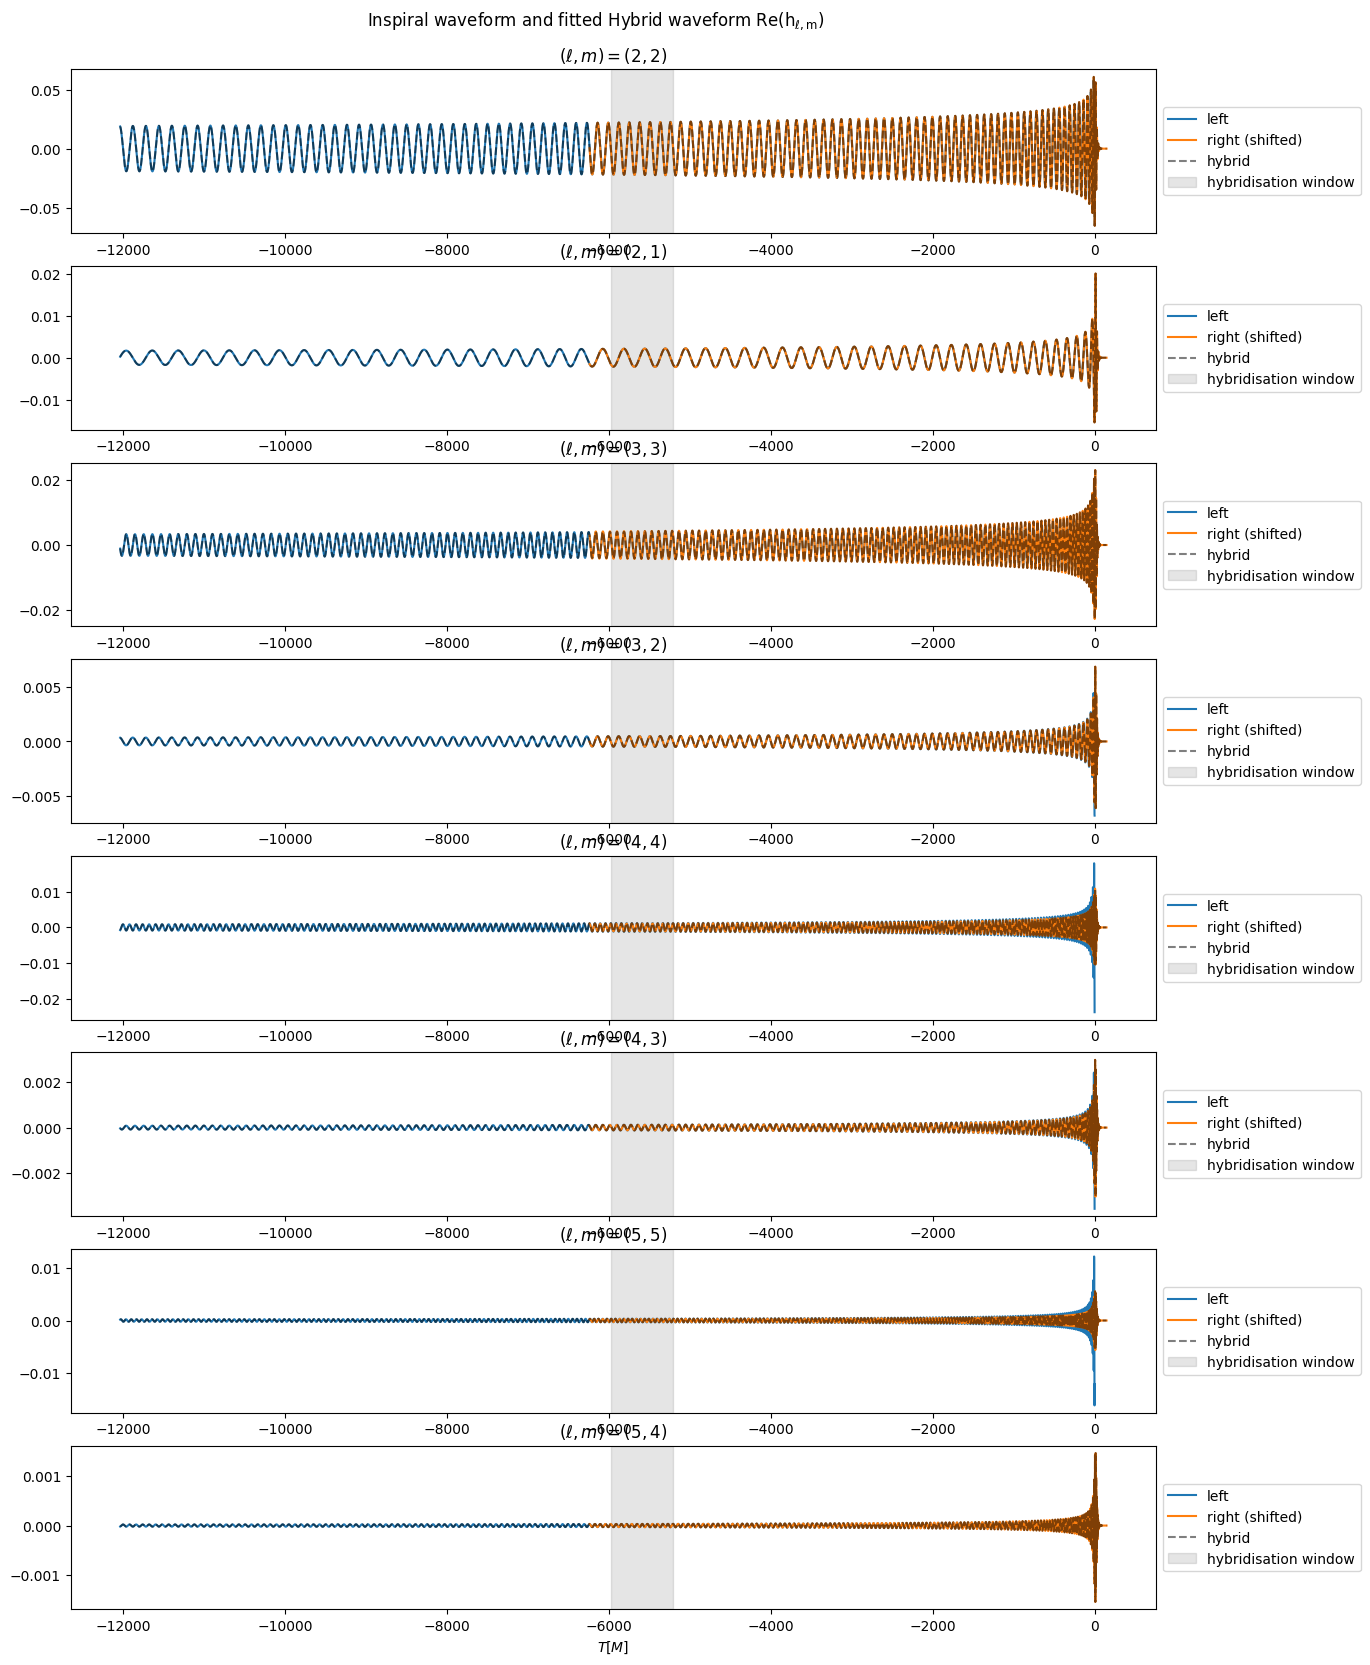

In [94]:
fig, axes = plt.subplots(len(modes), 1, figsize=(14, 20), dpi=100)
for i, mode in enumerate(modes):
    axes[i].plot(wf_left.times, wf_left.hlms[mode].real, label="left")
    axes[i].plot(
        wf_right_shifted.times,
        wf_right_shifted.hlms[mode].real,
        label="right (shifted)",
    )
    axes[i].plot(
        wf_hybrid.times,
        wf_hybrid.hlms[mode].real,
        c="k",
        ls="--",
        label="hybrid",
        alpha=0.5,
    )
    axes[i].axvspan(win1, win2, color="k", alpha=0.1, label="hybridisation window")
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_title(rf"$(\ell, m) = {mode}$")
    # axes[i].set_xlim(-1000,100)
fig.suptitle(r"Inspiral waveform and fitted Hybrid waveform $\rm{Re}( h_{\ell, m} )$", y=0.91)
plt.xlabel(r"$T [M]$")

Text(0.5, 0, '$T [M]$')

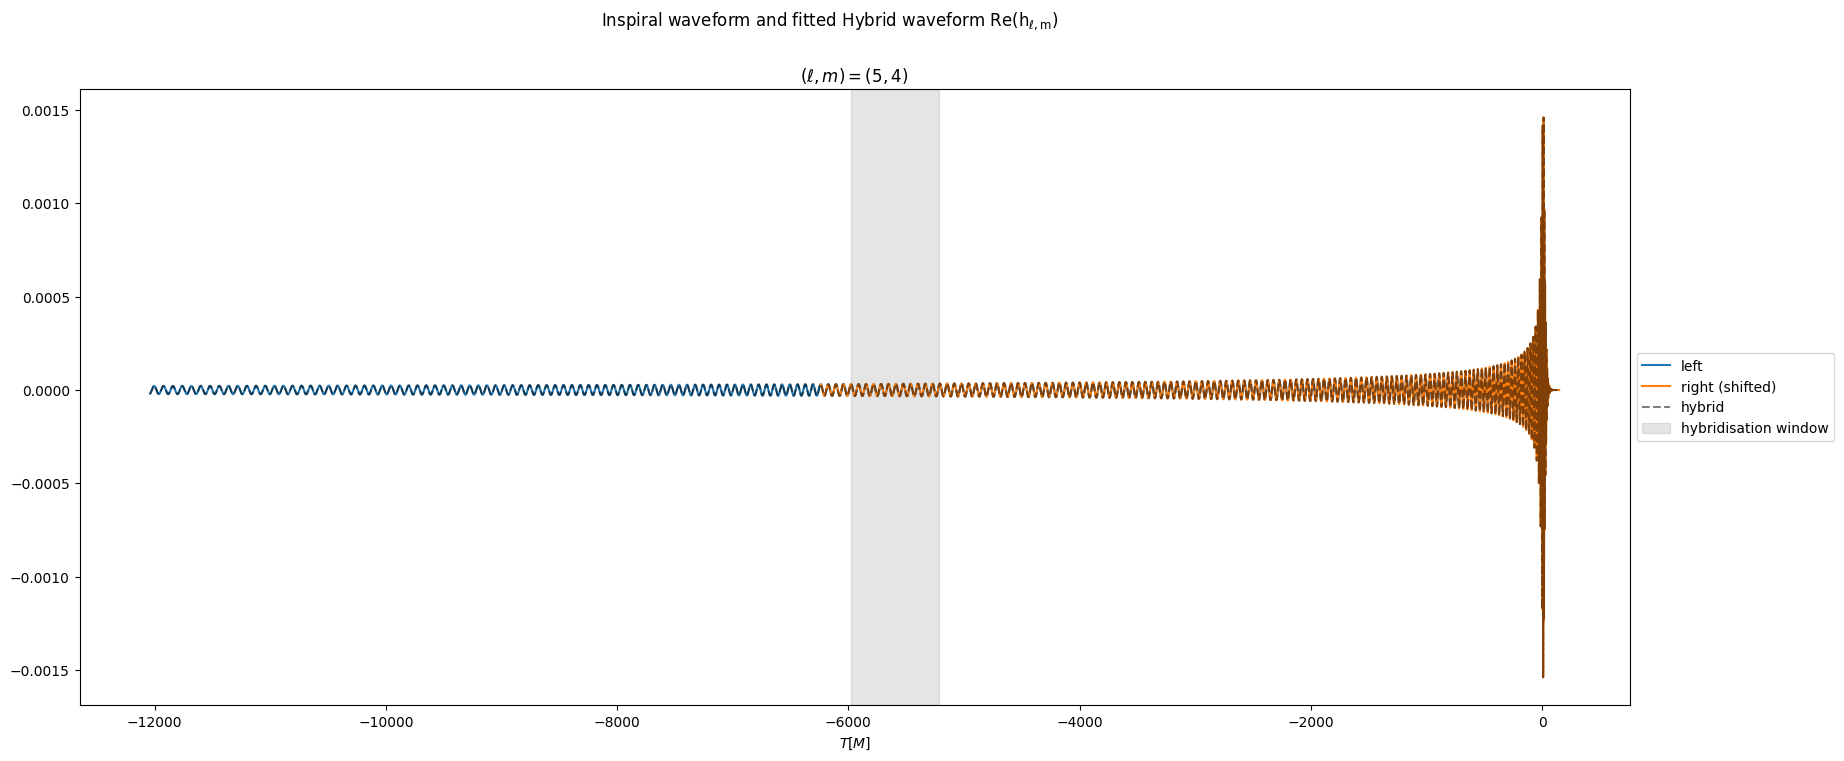

In [95]:
mode = (5,4)
fig, axes = plt.subplots(1, 1, figsize=(20, 8), dpi=100)
axes.plot(wf_left.times, wf_left.hlms[mode].real, label="left")
axes.plot(
    wf_right_shifted.times,
    wf_right_shifted.hlms[mode].real,
    label="right (shifted)",
)
axes.plot(
    wf_hybrid.times,
    wf_hybrid.hlms[mode].real,
    c="k",
    ls="--",
    label="hybrid",
    alpha=0.5,
)
axes.axvspan(win1, win2, color="k", alpha=0.1, label="hybridisation window")
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_title(rf"$(\ell, m) = {mode}$")
# axes.set_xlim(-3000, -2000)
fig.suptitle(r"Inspiral waveform and fitted Hybrid waveform $\rm{Re}( h_{\ell, m} )$")
plt.xlabel(r"$T [M]$")